In [1]:
import random

import numpy as np
import numpy.matlib
import matplotlib.image as pim
import matplotlib.pyplot as plt

In [2]:
def init_centroids(X, K):
    c = random.sample(list(X), K)
    return c


def closest_centroids(X, c):
    K = np.size(c, 0)
    idx = np.zeros((np.size(X, 0), 1))
    arr = np.empty((np.size(X, 0), 1))
    for i in range(0, K):
        y = c[i]
        temp = np.ones((np.size(X, 0), 1))*y
        b = np.power(np.subtract(X, temp), 2)
        a = np.sum(b, axis=1)
        a = np.asarray(a)
        a.resize((np.size(X, 0), 1))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr, 0, axis=1)
    idx = np.argmin(arr, axis=1)
    return idx


def compute_centroids(X, idx, K):
    n = np.size(X, 1)
    centroids = np.zeros((K, n))
    for i in range(0, K):
        ci = idx == i
        ci = ci.astype(int)
        total_number = sum(ci)
        ci.resize((np.size(X, 0), 1))
        total_matrix = np.matlib.repmat(ci, 1, n)
        ci = np.transpose(ci)
        total = np.multiply(X, total_matrix)
        centroids[i] = (1/total_number)*np.sum(total, axis=0)
    return centroids


def run_kMean(X, initial_centroids, max_iters):
    m = np.size(X, 0)
    n = np.size(X, 1)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    for i in range(1, max_iters):
        idx = closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

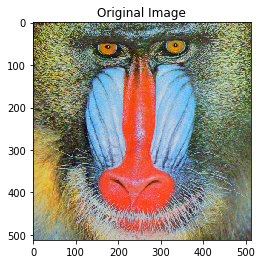

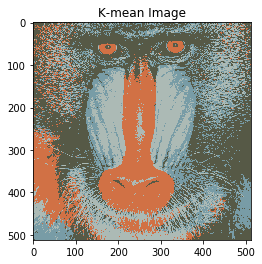

In [6]:
imgPath = '../assets/mandrill.jpg'
image = pim.imread(imgPath)
rows = image.shape[0]
cols = image.shape[1]
image = image / 255
X = image.reshape(image.shape[0] * image.shape[1], 3)

K = 4  # number of clusters
max_iters = 10  # number of times the k-mean should run

initial_centroids = init_centroids(X, K)
centroids, idx = run_kMean(X, initial_centroids, max_iters)

idx = closest_centroids(X, centroids)
X_recovered = centroids[idx]
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
plt.imshow(image, 'gray'), plt.title('Original Image')
plt.show()
plt.imshow(X_recovered, 'gray'), plt.title('K-mean Image')
plt.show()